# Praktikum Informationstechnik im Maschinenbau II
## P10 - Daten analysieren

## Aufgabe 2 - Datenanalyse

Bearbeiten Sie die folgen Aufgaben; Beantworten Sie die folgenden Fragen
1. Untersuchen Sie die Altersverteilung der Passagiere? 
2. Untersuchen Sie den Zusammenhang zwischen Alter, Ticketklasse und Überlebenswahrscheinlichkeit
3. Werten Sie den Ticketpreis statistisch aus

## __1. Altersverteilung__

__Teilaufgaben__
- Für wieviele Passagiere ist keine Altersangabe vorhanden? Welche?
- Jüngste:r, Älteste:r, Mittelwert, Medianwert (Ausgabe mit f-String)
- Histogramm mit 30 Klassen

### Altersangaben nicht vorhanden?

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Einlesen der Pickle-Datei aus Aufgabe 1
titanic = pd.read_pickle('titanic.pkl')

In [10]:
# Ausgabe als f-String
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      891 non-null    object  
 1   Sex       891 non-null    category
 2   Age       714 non-null    float64 
 3   Embarked  889 non-null    category
 4   Pclass    891 non-null    category
 5   Ticket    891 non-null    object  
 6   Fare      891 non-null    float64 
 7   Survived  891 non-null    boolean 
dtypes: boolean(1), category(3), float64(2), object(2)
memory usage: 39.2+ KB


In [16]:
# Ausgabe der Einträge ohne Altersangabe
titanic[titanic.Age.isnull()]

,Name,Sex,Age,Embarked,Pclass,Ticket,Fare,Survived
PassengerId,,,,,,,,
6,"Moran, Mr. James",male,NaN,Q,3,330877,8.4583,False
18,"Williams, Mr. Charles Eugene",male,NaN,S,2,244373,13.0000,True
20,"Masselmani, Mrs. Fatima",female,NaN,C,3,2649,7.2250,True
27,"Emir, Mr. Farred Chehab",male,NaN,C,3,2631,7.2250,False
29,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,Q,3,330959,7.8792,True
...,...,...,...,...,...,...,...,...
860,"Razi, Mr. Raihed",male,NaN,C,3,2629,7.2292,False
864,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,S,3,CA. 2343,69.5500,False
869,"van Melkebeke, Mr. Philemon",male,NaN,S,3,345777,9.5000,False


In [19]:
# Ausgabe der statistischen Daten als f-String
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot: >

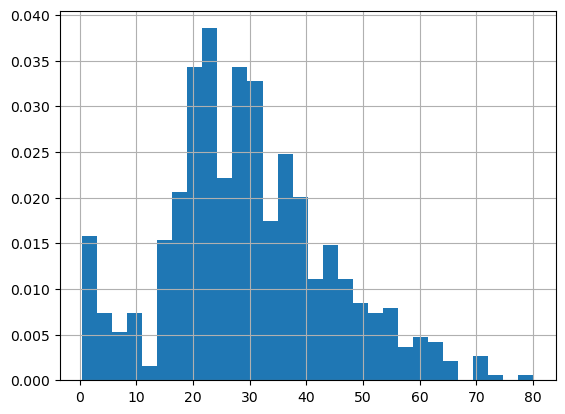

In [23]:
# Histogramm der Altersverteilung zeichnen
titanic.Age.hist(bins=30, density=True)

## __2. Zusammenhang zwischen Alter, Ticketklasse und Überlebenswahrscheinlichkeit__

__Teilaufgaben__
- Wieviele und welche Passagiere über 60 Jahren haben überlebt? Welche haben nicht überlebt?
- Erzeugen Sie eine Gruppierung für eine Auswertung der Überlebenswahrscheinlichkeit nach Alter und Ticket-Klasse. <br/> Teilen Sie datzu das Alter in folgende Intervalle ein [0-10], (10-20], (20-40], (40-60], (60-100) Jahre
- Ermitteln Sie mit dieser Gruppierung die Überlebenswahrscheinlichkeit differenziert nach Alter und Ticketklasse
- Ergründen Sie weiter den Zusammenhang zwischen Alter, Ticketklasse und Überlebenswahrscheinlichkeit

In [25]:
# Passagiere über 60
age_gt60 = titanic[titanic.Age > 60]
age_gt60

,Name,Sex,Age,Embarked,Pclass,Ticket,Fare,Survived
PassengerId,,,,,,,,
34,"Wheadon, Mr. Edward H",male,66.0,S,2,C.A. 24579,10.5000,False
55,"Ostby, Mr. Engelhart Cornelius",male,65.0,C,1,113509,61.9792,False
97,"Goldschmidt, Mr. George B",male,71.0,C,1,PC 17754,34.6542,False
117,"Connors, Mr. Patrick",male,70.5,Q,3,370369,7.7500,False
171,"Van der hoef, Mr. Wyckoff",male,61.0,S,1,111240,33.5000,False
253,"Stead, Mr. William Thomas",male,62.0,S,1,113514,26.5500,False
276,"Andrews, Miss. Kornelia Theodosia",female,63.0,S,1,13502,77.9583,True
281,"Duane, Mr. Frank",male,65.0,Q,3,336439,7.7500,False
327,"Nysveen, Mr. Johan Hansen",male,61.0,S,3,345364,6.2375,False


In [32]:
# Über 60-jährige, die überlebt haben
age_gt60_surv = titanic[(titanic.Age >60) & titanic.Survived]
age_gt60_surv

,Name,Sex,Age,Embarked,Pclass,Ticket,Fare,Survived
PassengerId,,,,,,,,
276,"Andrews, Miss. Kornelia Theodosia",female,63.0,S,1,13502,77.9583,True
484,"Turkula, Mrs. (Hedwig)",female,63.0,S,3,4134,9.5875,True
571,"Harris, Mr. George",male,62.0,S,2,S.W./PP 752,10.5000,True
631,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,S,1,27042,30.0000,True
830,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,NaN,1,113572,80.0000,True


In [ ]:
# Ausgabe als f-String

In [33]:
# Welche über 60 jährige haben nicht überlebt?
age_gt60_tod = titanic[(titanic.Age >60) & ~titanic.Survived]
age_gt60_tod

,Name,Sex,Age,Embarked,Pclass,Ticket,Fare,Survived
PassengerId,,,,,,,,
34,"Wheadon, Mr. Edward H",male,66.0,S,2,C.A. 24579,10.5000,False
55,"Ostby, Mr. Engelhart Cornelius",male,65.0,C,1,113509,61.9792,False
97,"Goldschmidt, Mr. George B",male,71.0,C,1,PC 17754,34.6542,False
117,"Connors, Mr. Patrick",male,70.5,Q,3,370369,7.7500,False
171,"Van der hoef, Mr. Wyckoff",male,61.0,S,1,111240,33.5000,False
253,"Stead, Mr. William Thomas",male,62.0,S,1,113514,26.5500,False
281,"Duane, Mr. Frank",male,65.0,Q,3,336439,7.7500,False
327,"Nysveen, Mr. Johan Hansen",male,61.0,S,3,345364,6.2375,False
439,"Fortune, Mr. Mark",male,64.0,S,1,19950,263.0000,False


In [37]:
pd.cut(titanic.Age, bins=[0, 10, 20, 40, 60, 100])

PassengerId
1      (20.0, 40.0]
2      (20.0, 40.0]
3      (20.0, 40.0]
4      (20.0, 40.0]
5      (20.0, 40.0]
           ...     
887    (20.0, 40.0]
888    (10.0, 20.0]
889             NaN
890    (20.0, 40.0]
891    (20.0, 40.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 20] < (20, 40] < (40, 60] < (60, 100]]

In [41]:
# Gruppierung der Passagiere nach Altersklassen und Ticketklasse
# Anzahlen ermitteln
anz_age_class = titanic.groupby([pd.cut(titanic.Age, bins=[0, 10, 20, 40, 60, 100])]).count()
anz_age_class

,Name,Sex,Age,Embarked,Pclass,Ticket,Fare,Survived
Age,,,,,,,,
"(0, 10]",64,64,64,64,64,64,64,64
"(10, 20]",115,115,115,115,115,115,115,115
"(20, 40]",385,385,385,384,385,385,385,385
"(40, 60]",128,128,128,128,128,128,128,128
"(60, 100]",22,22,22,21,22,22,22,22


In [ ]:
# Anzahl der Überlebenden nach Altersklasse und Ticketklasse (Hinweis: False zählt als 0, True als 1)
surv_age_class = 
surv_age_class

In [ ]:
# Quote berechnen
quote = 
quote

In [ ]:
# Zum Vergleich: Quote (Klasse <-> Überleben) ohne Altersbezug

In [ ]:
# Zum Vergleich Quote (Alter <-> Überleben) ohne Klassenbezug

In [ ]:
# Schlussfolgerungen

## __3. Statistik des Ticketpreise__

__Teilaufgaben__

- Wie hoch ist der mittlere Fahrpreis je Klasse?
- Welcher Fahrpreis wurde in 95% der Fälle nicht überschritten
- Erstellen Sie ein Kuchendiagramm des Fahrpreises (jeweils in 20 Pfund-Schritten)

In [11]:
# Mittlerer Preis, gruppiert nach Klassen

In [ ]:
# Welcher Fahrpreis wurde von 95 % der Fahrgäste nicht überschritten

In [ ]:
# Kuchendiagramm